# Python script to demonstrate underfitting, overfitting, and good fitting:

### 1. **Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

- **`PolynomialFeatures`**: To generate polynomial features for regression.
- **`LinearRegression`**: For fitting the linear model.

### 2. **Generate Synthetic Data**

In [13]:
np.random.seed(42)
X = np.sort(np.random.rand(40, 1) * 10, axis=0)  # Random inputs in the range [0, 10]
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sine function with noise

- **Purpose**: Generate a dataset of 40 random points in the range [0, 10] with some noise.
- **`np.random.seed(42)`**: Ensures reproducibility.
- **`X`**: Independent variable (input features).
- **`y`**: Dependent variable (target) created by adding noise to the sine function.

### 3. **Split Data into Training and Testing Sets**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Purpose**: Split the dataset into 80% training and 20% testing.
- **`test_size=0.2`**: 20% of the data is reserved for testing.
- **`random_state=42`**: Ensures the split is consistent each time the code is run.

- **Purpose**: Create a figure with a specified size for side-by-side plots.

### 4. **Degrees for Different Fits**

In [16]:
degrees = [1, 4, 15]
titles = ['Underfit (Degree 1)', 'Good Fit (Degree 4)', 'Overfit (Degree 15)']

- **`degrees`**: List of polynomial degrees to demonstrate underfitting, good fitting, and overfitting.
- **`titles`**: Titles for each subplot based on the degree of the polynomial.

### 5. **Generate Test Data for Plotting Predictions**

In [17]:
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

- **Purpose**: Create 100 evenly spaced points for plotting the prediction curves.

### 6. **Train and Visualize Models for Each Degree**

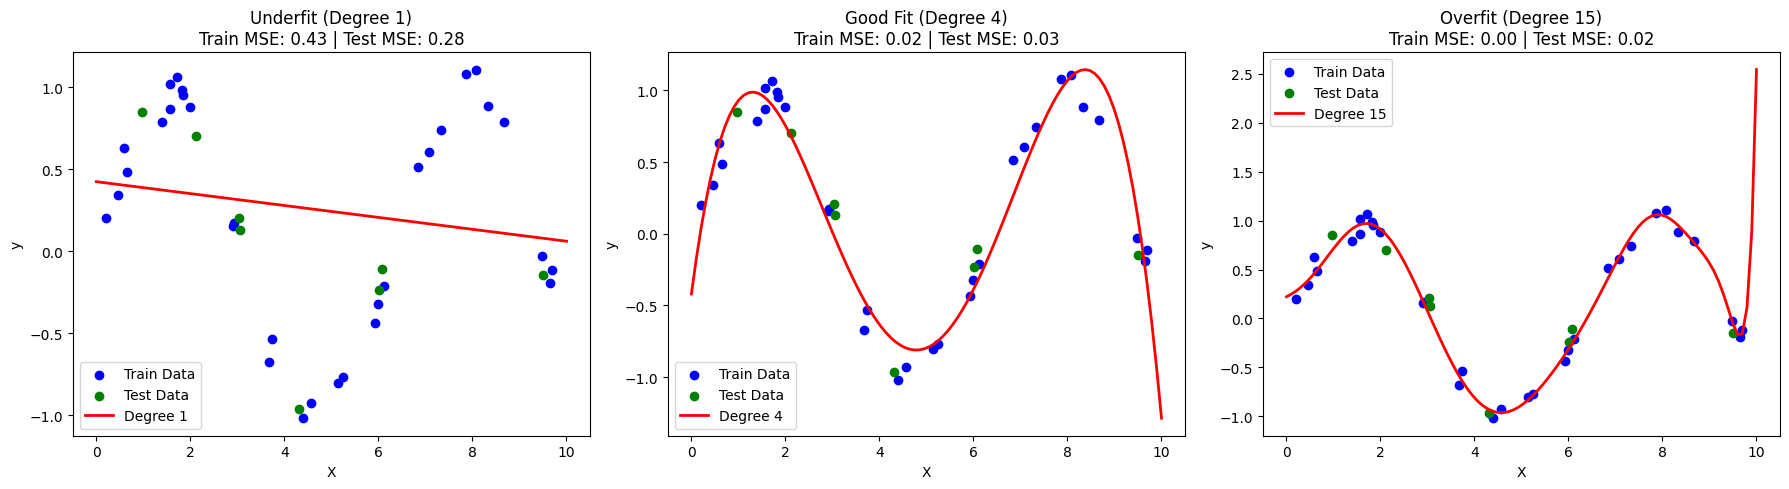

In [ ]:
# Plot Settings
plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_plot_poly = poly.transform(X_plot)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    y_plot_pred = model.predict(X_plot_poly)
    
    # Calculate Train and Test MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Plot results
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_plot, y_plot_pred, color='red', linewidth=2, label=f'Degree {degree}')
    plt.title(f'{titles[i]}\nTrain MSE: {train_mse:.2f} | Test MSE: {test_mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

- **poly** = PolynomialFeatures(degree=degree): Generate polynomial features of the specified degree.
- **fit_transform**: Fit and transform the training data.
- **transform**: Transform the test and plot data using the same polynomial transformation.